First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

C:\Users\sowmi\AppData\Local\Temp\ipykernel_6120\3256991938.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\sowmi\AppData\Local\Temp\ipykernel_6120\3256991938.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

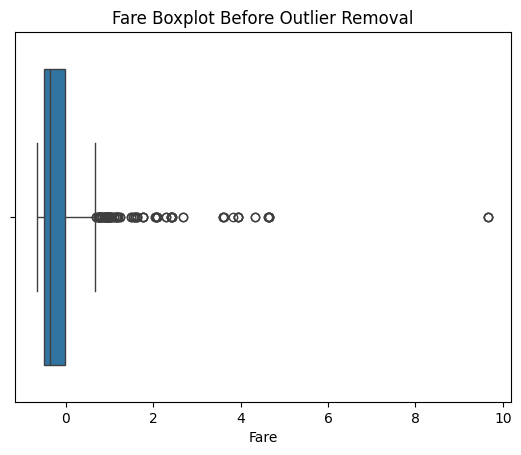

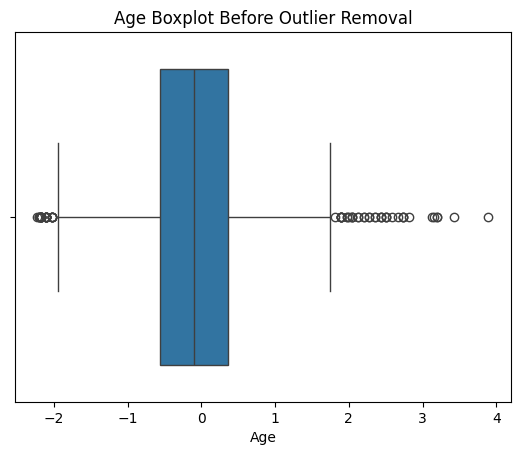


Dataset shape after cleaning: (708, 9)
Cleaned dataset saved as 'Cleaned_Titanic.csv'


In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 2. Load the Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# 3. Explore Basic Info
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nNull Values:\n", df.isnull().sum())

# 4. Handle Missing Values
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Cabin with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

# 5. Encode Categorical Variables
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])  # male:1, female:0
df['Embarked'] = label_enc.fit_transform(df['Embarked'])  # C,Q,S mapped to 0,1,2 (order depends on data)

# Drop columns that are not useful or hard to encode (e.g., Name, Ticket)
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 6. Feature Scaling
scaler = StandardScaler()
numeric_cols = ['Age', 'Fare']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 7. Outlier Detection and Removal using Boxplot + IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Visualize and remove outliers for 'Fare'
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot Before Outlier Removal")
plt.show()

df = remove_outliers(df, 'Fare')

# Visualize and remove outliers for 'Age'
sns.boxplot(x=df['Age'])
plt.title("Age Boxplot Before Outlier Removal")
plt.show()

df = remove_outliers(df, 'Age')

print("\nDataset shape after cleaning:", df.shape)

# 8. Save Cleaned Data
df.to_csv("Cleaned_Titanic.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_Titanic.csv'")
